In [ ]:
'''
in this notebook, we will visualize how the gradient of softmax and another variant behaves.
'''

In [39]:
# import necessary libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch

In [40]:
# softmax
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis=0)

# softmax derivative
def log_softmax_grad(pre_softmax, target):
    # create an one-hot vector of `target`
    one_hot = np.zeros_like(pre_softmax)
    one_hot[target] = 1.

    return one_hot - softmax(pre_softmax)

In [59]:
# harmonic
def harmonic(x, n=None):
    if n is None:
        n = np.sqrt(len(x))
    x_ = np.abs(x)
    return (x_ ** -n) / (x_ ** -n).sum()

# harmonic derivative
def log_harmonic_grad(pre_harmonic, target, n=None):
    if n is None:
        n = np.sqrt(len(pre_harmonic))

    # create an one-hot vector of `target`
    one_hot = np.zeros_like(pre_harmonic)
    one_hot[target] = 1.
    
    pos = -one_hot * n * np.sign(pre_harmonic) / np.abs(pre_harmonic)
    neg = -n * (np.abs(pre_harmonic) ** (-n-1)) * np.sign(pre_harmonic) / np.sum(np.abs(pre_harmonic) ** (-n))

    return pos - neg

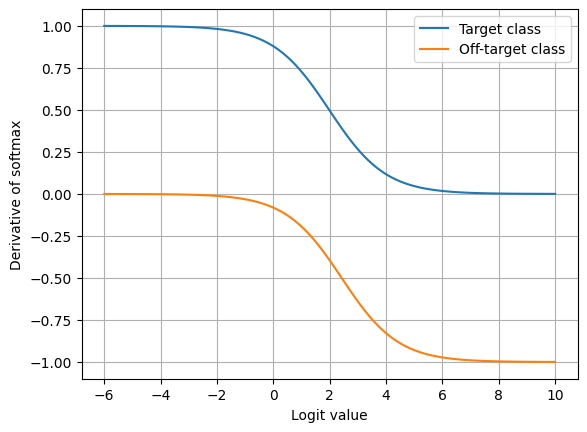

In [60]:
# let's first plot how the derivative of softmax changes for the target index
n_classes = 6
target_class = 0
off_target_class = 1
x = np.random.randn(n_classes)

target_logit = np.linspace(-6, 10, 100)
off_target_logit = np.linspace(-6, 10, 100)

target_deriv = [
    log_softmax_grad(np.array([tl, *x[1:]]), target_class)[target_class]
    for tl in target_logit
]

off_target_deriv = [
    log_softmax_grad(np.array([*x[:off_target_class], tl, *x[off_target_class+1:]]), 
                     target_class)[off_target_class]
    for tl in off_target_logit
]

# now plot target_deriv against target_logit
plt.plot(target_logit, target_deriv)
plt.plot(off_target_logit, off_target_deriv)

plt.xlabel('Logit value')
plt.ylabel('Derivative of softmax')

plt.legend(['Target class', 'Off-target class'])

plt.grid('on')
plt.show()


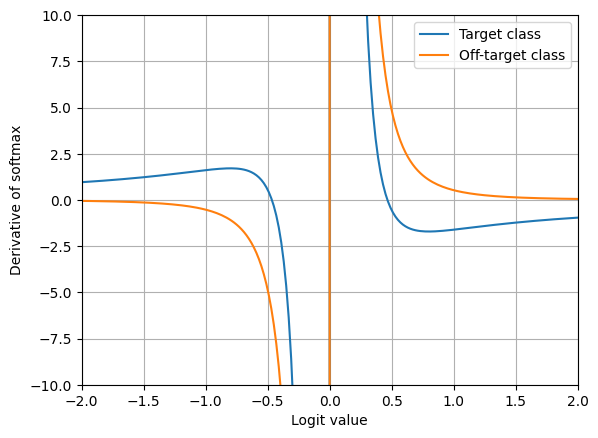

In [65]:
# let's first plot how the derivative of softmax changes for the target index
n_classes = 6
n=2
target_class = 0
off_target_class = 1
x = np.random.randn(n_classes)

target_logit = np.linspace(-10, 10, 1000)
off_target_logit = np.linspace(-10, 10, 1000)

target_deriv = [
    log_harmonic_grad(np.array([tl, *x[1:]]), target_class, n=n)[target_class]
    for tl in target_logit
]

off_target_deriv = [
    log_harmonic_grad(np.array([*x[:off_target_class], tl, *x[off_target_class+1:]]), 
                     target_class, n=n)[off_target_class]
    for tl in off_target_logit
]

# now plot target_deriv against target_logit
plt.plot(target_logit, target_deriv)
plt.plot(off_target_logit, off_target_deriv)

plt.xlabel('Logit value')
plt.ylabel('Derivative of softmax')

plt.legend(['Target class', 'Off-target class'])

plt.ylim(-10, 10)
plt.xlim(-2, 2)
plt.grid('on')
plt.show()
